In [1]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt


In [2]:
gdp = pd.read_csv('../GDP')
covid = pd.read_csv('../total_covid_cases.csv')
public_health = pd.read_csv('../public_allyears.csv')
pvt_2021 = pd.read_csv('../2021_private_ins.csv')

In [3]:
public_health.head()

,Characteristic,Total_x_x,Public Total Number_x_x,Public Number MOE_x_x,Public Total Percent_x_x,Public Percent MOE_x_x,Medicare Number_x_x,Medicare Number MOE_x_x,Medicare Percent_x_x,Medicare Percent MOE_x_x,...,Medicare Percent_y_y,Medicare Percent MOE_y_y,Medicaid Number_y_y,Medicaid Number MOE_y_y,Medicaid Percent_y_y,Medicaid Percent MOE_y_y,VA/CHAMPVA Number_y_y,VA/CHAMPVA Number MOE_y_y,VA/CHAMPVA Percent_y_y,VA/CHAMPVA Percent MOE_y_y
0,Total,"323,668","111,330",962,34.4,0.3,"57,720",401.0,17.8,0.1,...,18.4,0.1,"61,940",843,18.9,0.3,"3,151",192.0,1.0,0.1
1,Family Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,In families,"261,336","85,995","1,009",32.9,0.4,"39,243",484.0,15.0,0.2,...,15.5,0.2,"52,237",793,19.9,0.3,"2,138",161.0,0.8,0.1
3,In unrelated subfamilies,"1,069",453,74,42.4,4.6,37,19.0,3.4,1.7,...,2.2,1.4,394,81,38.5,5.6,Z,1.0,Z,0.1
4,Unrelated individuals,"61,264","24,882",475,40.6,0.5,"18,440",371.0,30.1,0.5,...,30.3,0.6,"9,309",315,14.6,0.5,"1,012",103.0,1.6,0.2


In [4]:
covid.columns = ['DATE','COVID_Cases']
covid

,DATE,COVID_Cases
0,2020-01-22,4
1,2020-01-23,6
2,2020-01-24,7
3,2020-01-25,7
4,2020-01-26,8
...,...,...
706,2021-12-28,53334068
707,2021-12-29,53823113
708,2021-12-30,54423030
709,2021-12-31,54895646


In [5]:
gdp_and_covid = gdp.merge(covid, how='right', on= 'DATE')
gdp_and_covid_cleaned = gdp_and_covid.dropna()

In [6]:
gdp_and_covid_cleaned

,Unnamed: 0,DATE,GDP,Growth,COVID_Cases
70,293.0,2020-04-01,19636.731,-8.83,240827
161,294.0,2020-07-01,21362.428,8.79,2754135
253,295.0,2020-10-01,21704.706,1.60,7378476
345,296.0,2021-01-01,22313.850,2.81,20361010
435,297.0,2021-04-01,23046.934,3.29,30432739
526,298.0,2021-07-01,23550.420,2.18,33505799
618,299.0,2021-10-01,24349.121,3.39,43544067
710,300.0,2022-01-01,24740.480,1.61,55199093


In [7]:
def lregress(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    print('R-value:', rvalue)

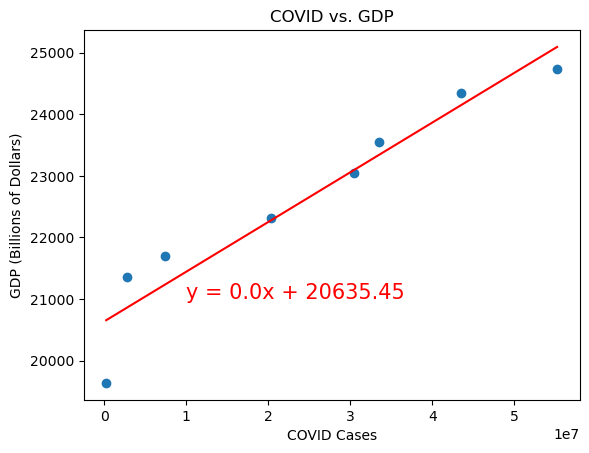

R-value: 0.9557475620915749


In [8]:
x_values = gdp_and_covid_cleaned['COVID_Cases']
y_values = gdp_and_covid_cleaned['GDP']
lregress(x_values, y_values, 'COVID vs. GDP', 'COVID Cases', 'GDP (Billions of Dollars)', (10000000,21000))